<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/polynomial_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
X = 8*np.random.rand(200,1)-4
y = 0.8*X**2+0.9*X+2+np.random.randn(200,1)

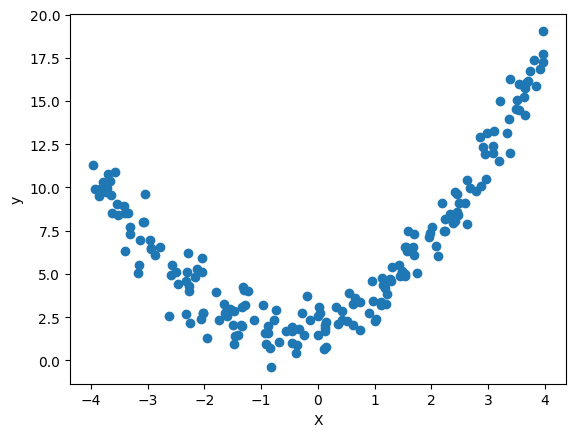

In [27]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score
y_preds = lr.predict(X_valid)
r2_score(y_valid,y_preds)

0.24723563206410393

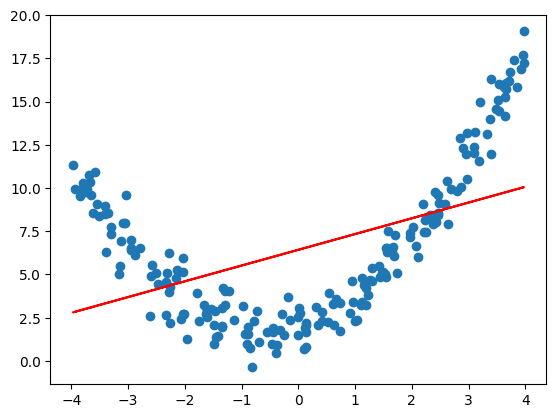

In [31]:
plt.plot(X_train,lr.predict(X_train),c='r')
plt.scatter(X,y)
plt.show();

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

In [38]:
lr.fit(X_train_poly,y_train) #never apply polynomial regression in 'y' target column

LinearRegression()

In [39]:
ypreds = lr.predict(X_valid_poly)
r2_score(y_valid,ypreds)

0.9370210297376184

In [40]:
print(X_train[0]) #shows the normal first data point
print(X_train_poly[0]) #shows the converted data point into a polynomial point with X^1, X^2

[-3.65414153]
[-3.65414153 13.35275033]


In [41]:
print(lr.coef_)
print(lr.intercept_)

[[0.84852775 0.78777219]]
[2.09136611]


In [46]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

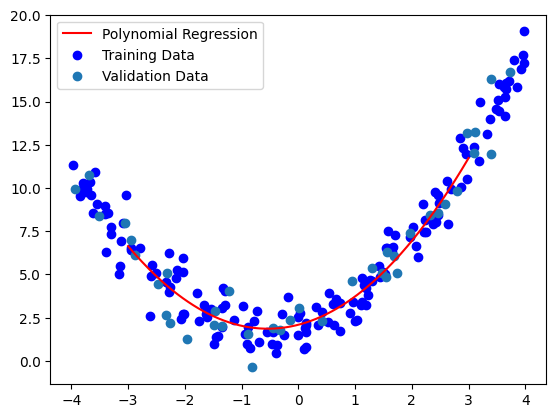

In [47]:
plt.plot(X_new, lr.predict(X_new_poly) , c='r',label='Polynomial Regression')
plt.scatter(X_train,y_train,c='b',label='Training Data')
plt.scatter(X_valid,y_valid,label='Validation Data')
plt.legend()
plt.show();